In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
trans = pd.read_csv('/content/drive//MyDrive/H&M/transactions_train.csv')
customers=pd.read_csv('/content/drive//MyDrive/H&M/customers.csv')
articles=pd.read_csv('/content/drive//MyDrive/H&M/articles.csv')

In [4]:
trans['t_dat'] = pd.to_datetime(trans['t_dat'])
trans['year']=trans['t_dat'].dt.to_period('Y')
trans['month_year']=trans['t_dat'].dt.to_period('M')

In [13]:
#AOQ by date
aoq=trans.groupby('t_dat').agg({'customer_id':'nunique','article_id': 'count'}).reset_index().rename(columns={'customer_id':'order','article_id':'items no.'})
aoq['AOQ']=aoq['items no.']/aoq['order']

In [17]:
pd.set_option('display.max_columns', None)
aoq['month_year']=aoq['t_dat'].dt.to_period('M')

In [18]:
#AOQ by month & year
aoq1=aoq.groupby('month_year',as_index=False).order.sum()
aoq1['month_year']=aoq1['month_year'].dt.strftime('%Y-%m')
aoq1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month_year  25 non-null     object
 1   order       25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [15]:
#Sales by month & Year
sales_gr_yr = trans.groupby('month_year',as_index=False).price.sum()
sales_gr_yr['month_year']=sales_gr_yr['month_year'].dt.strftime('%Y-%m')
sales_gr_yr.info()
#sales_gr_yr['month_year']=sales_gr_yr['month_year'].dt.strftime('%Y-%m')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month_year  25 non-null     object 
 1   price       25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


NameError: ignored

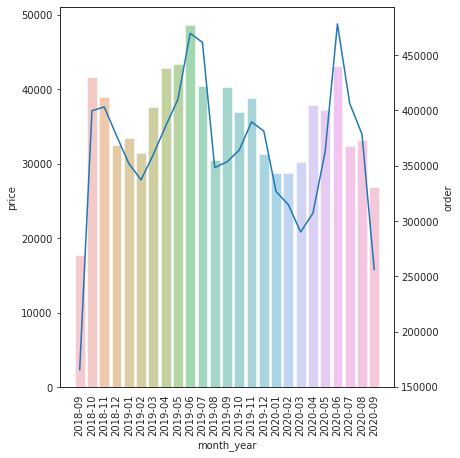

In [19]:
#sales by month & year
sns.set_style(style='white') 
fig, ax1 = plt.subplots(figsize=(6,7))
plt.xticks(rotation = 'vertical')
sns.barplot(x="month_year", y='price', data=sales_gr_yr, alpha=0.5,ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(x="month_year", y='order', data=aoq1,ax=ax2)
plt.xticks(rotation=0)
ax.set_xlabel('Month')
ax1.set_ylabel('Revenue')
ax2.set_ylabel('Orders')
plt.show()

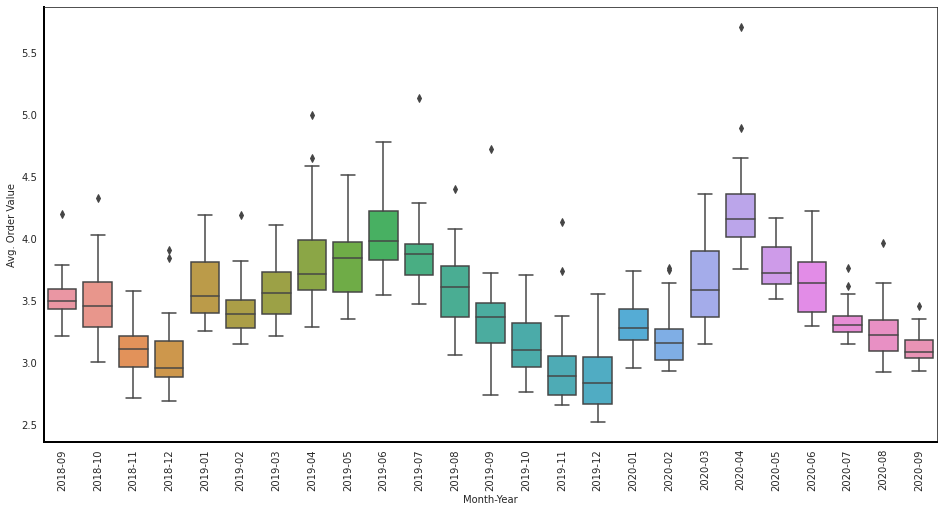

In [20]:
#AOQ chart
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x="month_year", y='AOQ', data=aoq)
plt.xticks(rotation=90)
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Avg. Order Value')
plt.show()

In [21]:
#AOV by date .nunique()
#order=trans.groupby('t_dat').agg({'customer_id':'count','price': 'sum'}).reset_index().rename(columns={'customer_id':'order','price':'total_order_value'})
order=trans.groupby('t_dat').agg({'customer_id':'nunique','price': 'sum'}).reset_index().rename(columns={'customer_id':'order','price':'total_order_value'})
#order=trans.groupby("date").agg({"duration": np.sum, "user_id": pd.Series.nunique})
order['AOV']=order['total_order_value']/order['order']

In [22]:
aoq=trans.groupby('t_dat').agg({'customer_id':'nunique','article_id': 'count'}).reset_index().rename(columns={'customer_id':'order','article_id':'items no.'})

In [23]:
#AOV Box plot 
order['month_year']=order['t_dat'].dt.to_period('M')
order

,t_dat,order,total_order_value,AOV,month_year
0,2018-09-20,13987,1415.345847,0.101190,2018-09
1,2018-09-21,13932,1419.262305,0.101871,2018-09
2,2018-09-22,5481,530.437627,0.096778,2018-09
3,2018-09-23,12435,1593.783085,0.128169,2018-09
4,2018-09-24,12630,1407.609610,0.111450,2018-09
...,...,...,...,...,...
729,2020-09-18,12924,1363.858119,0.105529,2020-09
730,2020-09-19,12233,1227.471305,0.100341,2020-09
731,2020-09-20,9384,1116.071068,0.118933,2020-09
732,2020-09-21,10119,1139.598051,0.112620,2020-09


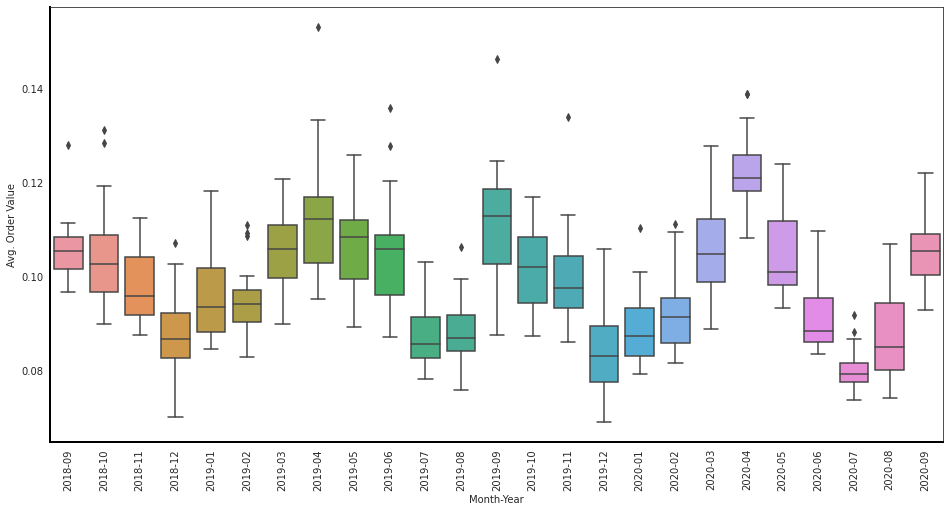

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x="month_year", y='AOV', data=order)
plt.xticks(rotation=90)
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Avg. Order Value')
plt.show()

In [ ]:
#transacion per users
tpu=trans.groupby('customer_id').agg({'article_id': 'count'}).reset_index().rename(columns={'customer_id':'order','article_id':'items no.'})
tpu

In [ ]:
tpu1=tpu.groupby('items no.').agg({'order': 'count'})
tpu1